In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv

In [2]:
def problem_data(X):
    return np.sin(np.dot(np.pi, X))

def init_theta(shape):
    theta = np.array(np.zeros(shape))
    return theta

def cost_function(n, Y, Y_pred):
    error = Y_pred - Y
    cost = (1/2*n) * np.dot(error.T, error)
    return cost

def linear_model(X, theta):
    return np.dot(X, theta)

def normal_equation(X, Y):
    theta = np.dot(pinv(np.dot(X.T, X)),  np.dot(X.T, Y))
    return theta

def cal_mean_model(Ed_model):
    # mean_theta = np.array([np.mean(all_theta[:, 0]), np.mean(all_theta[:, 1])])
    mean_model = np.mean(Ed_model, axis=0)
    return mean_model

In [5]:
X = np.linspace(-1, 1)

X_b = np.c_[np.ones((len(X), 1)), X]

y = problem_data(X)

steps = 10000

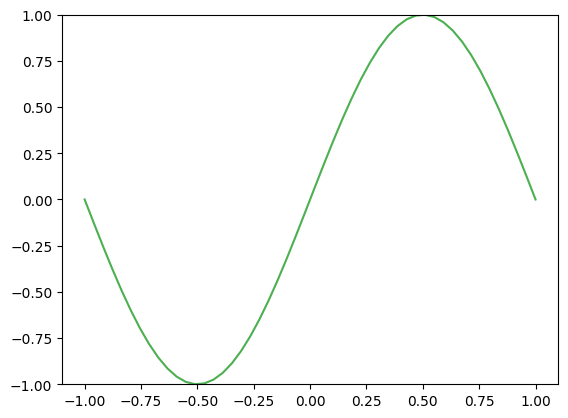

In [16]:
ed_prediction_list = list()

plt.plot(X, y, c="#4CAF50")
for i in range(steps):
    random_samples_X = np.random.choice(X, 2)
    y_sample = problem_data(random_samples_X)

    X_b_sample = np.c_[np.ones((len(random_samples_X), 1)), random_samples_X]
    n = len(random_samples_X)

    # Normal Equation
    normal_theta = normal_equation(X_b_sample, y_sample)
    theta_arr = np.array(normal_theta)
    sample_linear = linear_model(X_b, theta_arr)
    ed_prediction_list.append(sample_linear)
    plt.plot(X, sample_linear, c="black", alpha=0.001)


plt.ylim(-1, 1)
plt.show()


In [17]:
ed_arr_prediction = np.array(ed_prediction_list)
mean_model = cal_mean_model(ed_prediction_list)

bias_square = np.mean(np.square(mean_model - y))
var_x = np.mean(np.square(ed_arr_prediction - mean_model))
variance = np.mean(var_x)
E_out = bias_square + variance
print("Bias:", bias_square)
print("Variance:", variance)
print("E_out:", E_out)

Bias: 0.22269309479728416
Variance: 1.681421319570654
E_out: 1.904114414367938


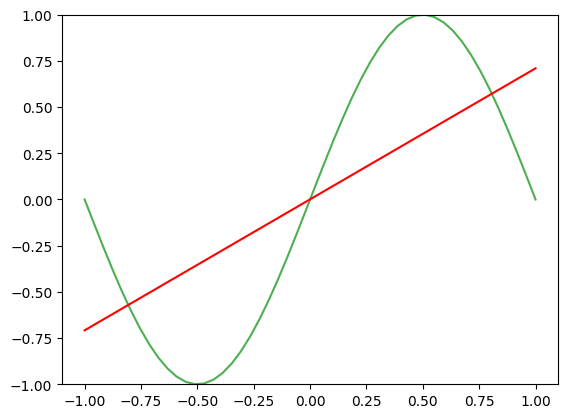

In [18]:
plt.plot(X, y, c="#4CAF50")
plt.plot(X, mean_model, c='red')
plt.ylim(-1, 1)
plt.show()